# Binned fits solutions: Exercise 12.2 

Generate a file ```dati_2.txt``` containing 10,000 events
distributed according to a Gaussian probability distribution.
  * Write a program that fits the events saved in the file ```dati_2.txt```
    using the binned and unbinned maximum likelihood methods,
    and compare the results of the two techniques.

### sample generation and file saving

In [1]:
from myrand import generate_TCL_ms

N_evt = 10_000
sample_gaus = generate_TCL_ms (1., 0.7, N_evt)
print (len (sample_gaus))

with open (r'dati_2.txt', 'w') as fp :
    for item in sample_gaus:
        # write each item on a new line
        fp.write("%s\n" % item)
    print('Done')

10000
Done


### fit with binned maximum likelihood

In [6]:
import numpy as np
from iminuit import Minuit
from math import floor, ceil
from iminuit.cost import ExtendedBinnedNLL
from matplotlib import pyplot as plt
from scipy.stats import expon, norm


bin_content, bin_edges = np.histogram (sample_gaus, bins = floor (N_evt/100), 
                                       range = (floor (min (sample_gaus)), ceil (max (sample_gaus))))

def mod_signal_bin (bin_edges, N_signal, mu, sigma):
    return N_signal * norm.cdf (bin_edges, mu, sigma)

my_cost_func_bin = ExtendedBinnedNLL (bin_content, bin_edges, mod_signal_bin)
my_minuit_bin = Minuit (
                        my_cost_func_bin, 
                        N_signal = sum (bin_content), 
                        mu = np.mean (sample_gaus), 
                        sigma = np.std (sample_gaus),
                       )
my_minuit_bin.limits['N_signal', 'sigma'] = (0, None)
my_minuit_bin.migrad ()
assert my_minuit_bin.valid
display (my_minuit_bin)

# get the estimate of the N_background and tau parameter for the final fit
mean_bin = [my_minuit_bin.values[1], my_minuit_bin.errors[1]]
sigma_bin = [my_minuit_bin.values[2], my_minuit_bin.errors[2]]


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 104.1 (χ²/ndof = 1.1)      │              Nfcn = 34               │
│ EDM = 1.65e-09 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N_signal │  10.0e3   │   0.1e3   │            │            │    0    │         │       │
│ 1 │ mu       │   1.003   │   0.007   │            │            │         │         │       │
│ 2 │ sigma    │   0.699   │   0.005   │            │            │    0    │         │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬────────────────────────────┐
│          │ N_signal       mu    sigma │
├──────────┼────────────────────────────┤
│ N_signal │    1e+04        0 0.119e-3 │
│       mu │        0 4.88e-05        0 │
│    sigma │ 0.119e-3        0 2.45e-05 │
└──────────┴────────────────────────────┘

### fit with unbinned maximum likelihood

In [8]:
from iminuit.cost import UnbinnedNLL

def mod_signal_unb (x, mu, sigma) :
    return norm.pdf(x, mu, sigma)

my_cost_func_unb = UnbinnedNLL (sample_gaus, mod_signal_unb)

my_minuit_unb = Minuit (
                        my_cost_func_unb, 
                        mu = np.mean (sample_gaus), 
                        sigma = np.std (sample_gaus)
                       )
my_minuit_unb.limits["sigma"] = (0, None)
my_minuit_unb.migrad ()
assert my_minuit_unb.valid
display (my_minuit_unb)

mean_unb = [my_minuit_unb.values[0], my_minuit_unb.errors[0]]
sigma_unb = [my_minuit_unb.values[1], my_minuit_unb.errors[1]]

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.12e+04                   │              Nfcn = 22               │
│ EDM = 1.73e-15 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │   1.003   │   0.007   │            │            │         │         │       │
│ 1 │ sigma │   0.698   │   0.005   │            │            │    0    │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────┐
│       │       mu    sigma │
├───────┼───────────────────┤
│    mu │ 4.88e-05        0 │
│ sigma │        0 2.44e-05 │
└───────┴───────────────────┘

### comparison between the two

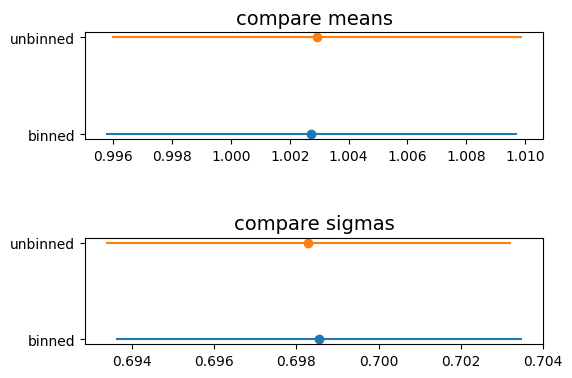

In [9]:
fig, axes = plt.subplots (2, 1)

# setting the two sub-figures apart
fig.tight_layout (pad=5.0)

# plot means
axes[0].set_title ('compare means', size=14)
axes[0].errorbar (mean_bin[0], 'binned', xerr = mean_bin[1], marker = 'o')
axes[0].errorbar (mean_unb[0], 'unbinned', xerr = mean_unb[1], marker = 'o')

#plot sigmas
axes[1].set_title ('compare sigmas', size=14)
axes[1].errorbar (sigma_bin[0], 'binned', xerr = sigma_bin[1], marker = 'o')
axes[1].errorbar (sigma_unb[0], 'unbinned', xerr = sigma_unb[1], marker = 'o')

plt.show ()
